# Лабораторная работа 6

## Общая информация

**Дата выдачи**: 05.12.2022/09.12.2022

**Срок сдачи**: 19.12.2022/23.12.2022 *(Но требуется обязательная демонстрация текущего прогресса преподавателю во время лабораторного занятия 12.12.2022/16.12.2022)*

### О задании
Целью данного задания является приобретение навыков работы с текстом, обучение моделей классификации на этих данных. 

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов.

Сдача заданий после указанного срока сдачи ведёт к снижению оценки.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

### Формат сдачи
Устная защита выполненной лабораторной работы ОБЯЗАТЕЛЬНА!

После успешной устной защиты переименуйте получившийся файл `*.ipynb` в соответствии со следующим форматом: *Username_lab_6.ipynb*, где Username — ваша фамилия на латинице (например, `lehusheu_lab_6.ipynb`) и отправьте этот файл электронной почтой по адресу `dmitri.legushev.bsu@gmail.com` c темой письма *Фамилия преподавателя - Лабораторная работа 6 - Фамилия Имя Отчество* (для обоих подгрупп). Подгруппа Атрохова Кирилла Георгиевича также ставит в копию адрес `kiryl.atrokhau+ml2022@gmail.com`. Это будет являться письменным отчетом о выполнении лабораторной работы.

**Задача:** В Швейцарии 4 диалекта немецкого языка. Цель лабораторной работы -- предсказать диалект по фрагменту разговорной речи.

**Данные:**

Описание файлов:
- train.csv - обучающая выборка
- test.csv - тестовая выборка
- sampleSubmission.csv - пример результирующего файла для его сабмита на кэгл

Описание колонок:
- Id - уникальный индекс для тестовой выборки (test.csv)
- Text - фрагмент речи
- Label - целевой класс языка для конкретного фрагмента речи (train.csv)
- Prediction - предсказанный класс языка (sampleSubmission.csv)

Описание классов:

`BE Bernese
 LU Lucerne
 ZH Zurich
 BS Basel`
    
    
**Подробнее о данных:** https://www.kaggle.com/competitions/swiss-dialect-identification/data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier


import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.activations import softmax, relu
from tensorflow.keras import regularizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.regularizers import L2
from livelossplot import PlotLossesKeras

1. Загрузить датафреймы через pandas. Выполнить предобработку `Bag of Words`.

In [64]:
train = pd.read_csv('data/train.csv')

In [56]:
train.count()

Text     15616
Label    15616
dtype: int64

In [264]:
csr_matrix(np.diag([1,2,3])).toarray()

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]], dtype=int32)

In [265]:
cntvr = CountVectorizer()
bow_train = cntvr.fit_transform(train.Text)

In [4]:
bow_train_st = StandardScaler().fit_transform(bow_train.toarray())
bow_train_mm = MinMaxScaler().fit_transform(bow_train.toarray())

In [3]:
le = LabelEncoder()
train.Label = le.fit_transform(train.Label)

In [267]:
X_train, X_test, y_train, y_test = train_test_split(bow_train, train.Label, random_state=42, test_size=0.1)

2. Обучить различные модели `Random forest`, `Gradient boosting`, `SGD classifier` и тд (можно попробовать полносвязную нейронную сеть), снять метрику `accuracy` на валидационных данных.

### Random Forest

In [6]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train,y_train)

pred = rf.predict(X_test)

In [7]:
print(accuracy_score(pred, y_test))

0.7189500640204866


### Gradient Boosting

In [8]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

pred = gb.predict(X_test)

In [9]:
print(accuracy_score(pred, y_test))

0.674775928297055


### SGD classifier

In [133]:
sgd = SGDClassifier(n_jobs=-1,penalty='l2')
sgd.fit(X_train,y_train)
pred = sgd.predict(X_test)

In [134]:
print(accuracy_score(pred, y_test))

0.8111395646606914


In [268]:
X_train2 = np.array(X_train.toarray())
X_train2 = X_train2.reshape(*X_train2.shape,1)

In [269]:
ohe = OneHotEncoder(sparse=False)
y_train2 = ohe.fit_transform(np.array(y_train).reshape(-1,1))
#tmp = y_train2.shape
#y_train2 = y_train2.reshape(*tmp,1)

In [270]:
X_test2 = np.array(X_test.toarray())
X_test2 = X_test2.reshape(*X_test2.shape,1)

In [271]:
y_test2 = ohe.fit_transform(np.array(y_test).reshape(-1,1))
#tmp = y_test2.shape
#y_test2 = y_test2.reshape(*tmp,1)

### NN

In [280]:
model = Sequential([
    Dense(16, input_shape = X_train2[0].shape, activation=relu, kernel_regularizer = L2(1e-4)),
    Dense(32, activation=relu, kernel_regularizer = L2(1e-4)),
    Dense(16, activation=relu, kernel_regularizer = L2(1e-4)),
    Flatten(),
    Dense(4, activation='softmax', kernel_regularizer = L2(1e-4))
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [286]:
model.save('model1.h5')

In [285]:
model.fit(X_train2, y_train2, epochs=1, batch_size=50,verbose=1,validation_data = [X_test2,y_test2])

res = model.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

49/49 [==============================] - 6s 130ms/step - loss: 0.5095 - accuracy: 0.8111
accuracy =  0.8111395835876465


In [287]:
best_model = keras.models.load_model('model1.h5')

In [288]:
res = best_model.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

49/49 [==============================] - 6s 127ms/step - loss: 0.5095 - accuracy: 0.8111
accuracy =  0.8111395835876465


3. Выполнить предобработку `tf-idf`, поварировать параметры предобработки. Обучить модели. Как изменилось качество моделей с предобработкой `Bag of words` и `tf-idf`?

In [197]:
lst = np.linspace(0.001,0.2,30)
res = []
for i in lst:
    tfidf = TfidfVectorizer(max_df=i)
    tfidf_train = tfidf.fit_transform(train.Text)
    X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(tfidf_train, train.Label, random_state=42, test_size=0.1)
    sgd = SGDClassifier(n_jobs=-1)
    sgd.fit(X_train_tf,y_train_tf)
    pred = sgd.predict(X_test_tf)
    res.append(accuracy_score(pred, y_test_tf))

<AxesSubplot:>

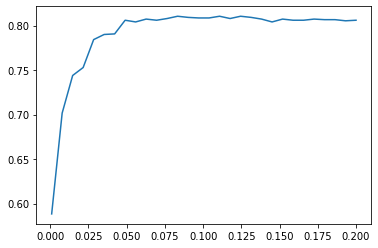

In [199]:
sns.lineplot(x=lst,y=res)

In [46]:
best = 0.085

In [47]:
tfidf = TfidfVectorizer(max_df=best)
tfidf_train = tfidf.fit_transform(train.Text)

In [49]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(tfidf_train, train.Label, random_state=42, test_size=0.1)
sgd = SGDClassifier(n_jobs=-1)
sgd.fit(X_train_tf,y_train_tf)
pred = sgd.predict(X_test_tf)
print(accuracy_score(pred, y_test_tf))

0.8104993597951344


### Random Forest

In [206]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train_tf,y_train_tf)

pred = rf.predict(X_test_tf)

print(accuracy_score(pred, y_test_tf))

0.7202304737516005


### Gradient Boosting

In [207]:
gb = GradientBoostingClassifier()
gb.fit(X_train_tf, y_train_tf)

pred = gb.predict(X_test_tf)

print(accuracy_score(pred, y_test_tf))

0.6766965428937259


In [50]:
X_train2 = np.array(X_train_tf.toarray())
X_train2 = X_train2.reshape(*X_train2.shape,1)

ohe = OneHotEncoder(sparse=False)
y_train2 = ohe.fit_transform(np.array(y_train_tf).reshape(-1,1))
#tmp = y_train2.shape
#y_train2 = y_train2.reshape(*tmp,1)

X_test2 = np.array(X_test_tf.toarray())
X_test2 = X_test2.reshape(*X_test2.shape,1)

y_test2 = ohe.fit_transform(np.array(y_test_tf).reshape(-1,1))
#tmp = y_test2.shape
#y_test2 = y_test2.reshape(*tmp,1)

### NN

In [291]:
model = Sequential([
    Dense(16, input_shape = X_train2[0].shape, activation=relu, kernel_regularizer = L2(1e-4)),
    Dense(32, activation=relu, kernel_regularizer = L2(1e-4)),
    Dense(16, activation=relu, kernel_regularizer = L2(1e-4)),
    Flatten(),
    Dense(4, activation='softmax', kernel_regularizer = L2(1e-4))
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [257]:
model.save('model3.h5')

In [296]:
model.fit(X_train2, y_train2, epochs=1, batch_size=50,verbose=1,validation_data = [X_test2,y_test2])


282/282 [==============================] - 113s 401ms/step - loss: 0.1552 - accuracy: 0.9631 - val_loss: 0.5667 - val_accuracy: 0.8156


In [297]:
best_model = keras.models.load_model('model3.h5')

In [260]:
res = best_model.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

49/49 [==============================] - 7s 138ms/step - loss: 0.5000 - accuracy: 0.8291
accuracy =  0.8290653228759766


4. Подумать как могут н-граммы слов или символов улучшить результата для предсказания языка. Попробовать составить токены n-gramm слов или символов и обучить выбранные модели на них. 

In [57]:
##stop_data = pd.read_csv('stopwords.csv')

In [58]:
##stop_list = stop_data.values.reshape(1,-1)[0].tolist()

<AxesSubplot:>

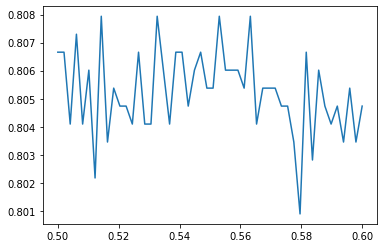

In [22]:
lst = np.linspace(0.5,0.6,50)
res = []
for i in lst:
    tfidf = TfidfVectorizer(ngram_range=(1,2), max_df=i)
    tfidf_train = tfidf.fit_transform(train.Text)
    X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(tfidf_train, train.Label, random_state=42, test_size=0.1)
    sgd = SGDClassifier(n_jobs=-1)
    sgd.fit(X_train_tf,y_train_tf)
    pred = sgd.predict(X_test_tf)
    res.append(accuracy_score(pred, y_test_tf))

sns.lineplot(x=lst,y=res)

In [25]:
cntvr = TfidfVectorizer(ngram_range=(1,2), max_df=0.55)
bow_train2 = cntvr.fit_transform(train.Text)
bow_train2 = bow_train2.astype('float32')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(bow_train2, train.Label, random_state=42, test_size=0.1)

### Random Forest

In [61]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train,y_train)

pred = rf.predict(X_test)

print(accuracy_score(pred, y_test))

0.6978233034571063


### Gradient Boosting

In [56]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

pred = gb.predict(X_test)

print(accuracy_score(pred, y_test))

0.6542893725992317


### SGD classifier

In [35]:
sgd = SGDClassifier(n_jobs=-1)
sgd.fit(X_train,y_train)
pred = sgd.predict(X_test)

print(accuracy_score(pred, y_test))

0.8060179257362355


In [38]:
X_train2 = np.array(X_train.toarray())
X_train2 = X_train2.reshape(*X_train2.shape,1)

ohe = OneHotEncoder(sparse=False)
y_train2 = ohe.fit_transform(np.array(y_train).reshape(-1,1))
#tmp = y_train2.shape
#y_train2 = y_train2.reshape(*tmp,1)

X_test2 = np.array(X_test.toarray())
X_test2 = X_test2.reshape(*X_test2.shape,1)

y_test2 = ohe.fit_transform(np.array(y_test).reshape(-1,1))
#tmp = y_test2.shape
#y_test2 = y_test2.reshape(*tmp,1)

### NN

In [39]:
model = Sequential([
    Dense(16, input_shape = X_train2[0].shape, activation=relu, kernel_regularizer = L2(1e-4)),
    Dense(32, activation=relu, kernel_regularizer = L2(1e-4)),
    Dense(16, activation=relu, kernel_regularizer = L2(1e-4)),
    Flatten(),
    Dense(4, activation='softmax', kernel_regularizer = L2(1e-4))
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [305]:
#model.save('model2.h5')

In [40]:
model.fit(X_train2, y_train2, epochs=1, batch_size=50,verbose=1,validation_data = [X_test2,y_test2])
res = model.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

49/49 [==============================] - 31s 632ms/step - loss: 0.5271 - accuracy: 0.8207
accuracy =  0.820742666721344


In [43]:
best_model = keras.models.load_model('model2.h5')

In [42]:
best_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 16287, 16)         32        
                                                                 
 dense_53 (Dense)            (None, 16287, 32)         544       
                                                                 
 dense_54 (Dense)            (None, 16287, 16)         528       
                                                                 
 flatten_13 (Flatten)        (None, 260592)            0         
                                                                 
 dense_55 (Dense)            (None, 4)                 1042372   
                                                                 
Total params: 1,043,476
Trainable params: 1,043,476
Non-trainable params: 0
_________________________________________________________________


In [307]:
res = best_model.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

49/49 [==============================] - 7s 137ms/step - loss: 0.4940 - accuracy: 0.8342
accuracy =  0.8341869115829468


5. Отправить лучший результат на https://www.kaggle.com/competitions/swiss-dialect-identification/overview

6. (дополнительно на 10 баллов) Обучить модель `Word2Vec` или `Doc2Vec` на предложенном корпусе текста, выделить эмбендинги при помощи полученной модели, затем обучить выбранные модели классификации на них и оценить качество работы моделей на эмбендингах.

In [86]:
pip install smart-open


  Using cached smart_open-6.2.0-py3-none-any.whl (58 kB)



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: c:\users\roman\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [91]:
pip install gensim

  Using cached gensim-4.2.0-cp39-cp39-win_amd64.whl (23.9 MB)
  Using cached Cython-0.29.28-py2.py3-none-any.whl (983 kB)



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: c:\users\roman\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [90]:
import smart_open
import gensim

In [91]:
def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding='utf-8') as f:
        for i, line in enumerate(f):
            if line.startswith('Text'):
                continue
            tokens = gensim.utils.simple_preprocess(",".join(line.split(',')[:-1]))
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [92]:
train_corpus = list(read_corpus('data/train.csv'))

In [93]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [94]:
model.build_vocab(train_corpus)

In [95]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

# Kaggle

In [53]:
test = pd.read_csv('data/test.csv')

In [231]:
tf_test = tfidf.transform(test.Text)

In [232]:
pred = sgd.predict(tf_test)

In [238]:
pred_label = le.inverse_transform(pred)

In [244]:
pd.DataFrame({"Id":test.Id,"Prediction": pred_label}).to_csv('mysub_nn.csv', index=False)

In [54]:
cnt_test = tfidf.transform(test.Text)
cnt_test.toarray().shape

(2500, 16287)

In [55]:
cnt_test2 = np.array(cnt_test.toarray())
cnt_test2 = cnt_test2.reshape(*cnt_test2.shape,1)

In [56]:
best_model = keras.models.load_model('model2.h5')

In [57]:
pred = best_model.predict(cnt_test2)

79/79 [==============================] - 11s 130ms/step


In [69]:
pred_label = ohe.inverse_transform(pred)
pred_label = le.inverse_transform(pred_label.reshape(1,-1)[0])

In [70]:
pd.DataFrame({"Id":test.Id,"Prediction": pred_label}).to_csv('mysub_nn.csv', index=False)

Help links:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://www.nltk.org/api/nltk.lm.html
- https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92